### Classify Movie Review
- Binary Classification on IMDB Dataset
- I/P : 50,000 Reviews
- O/P : Positive or Negative

In [0]:
from keras.datasets import imdb
import numpy as np

### Dataset Preparation

In [0]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [185]:
print(XT.shape,Xt.shape)

(25000,) (25000,)


In [186]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

In [2]:
#print(word_idx.items())

In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [1]:
#print(idx_word.items())

In [191]:
actual_review = ' '.join([idx_word.get(idx-3,'#') for idx in XT[0]])
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Vectorize the data
- Vector size : 10000, so every sentence will be respresented by a vector of size 10000

In [0]:
def vectorize_sentences(sentences,dim=10000):
  outputs = np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    outputs[i,idx] = 1
  return outputs 

In [0]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [194]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [195]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
Y_train = np.array(YT).astype('float32')
Y_test = np.array(Yt).astype('float32')

### Defining the Model Architecture
- Use fully connected dense layers with ReLU Activation
- 2 hidden layers with 16 units each
- 1 o/p layer with one unit (Sigmoid activation)

In [0]:
from keras import models
from keras.layers import Dense

In [0]:
# Define the models
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
# Compile the models
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [200]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Training & Validation

In [0]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]
y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [202]:
hist = model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 3s 133us/step - loss: 0.4831 - acc: 0.8061 - val_loss: 0.3682 - val_acc: 0.8638
Epoch 2/4
20000/20000 [==============================] - 2s 102us/step - loss: 0.2836 - acc: 0.9056 - val_loss: 0.3004 - val_acc: 0.8816
Epoch 3/4
20000/20000 [==============================] - 2s 103us/step - loss: 0.2143 - acc: 0.9274 - val_loss: 0.2717 - val_acc: 0.8924
Epoch 4/4
20000/20000 [==============================] - 2s 103us/step - loss: 0.1724 - acc: 0.9418 - val_loss: 0.2706 - val_acc: 0.8930


### Visualizing the Results

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
h = hist.history

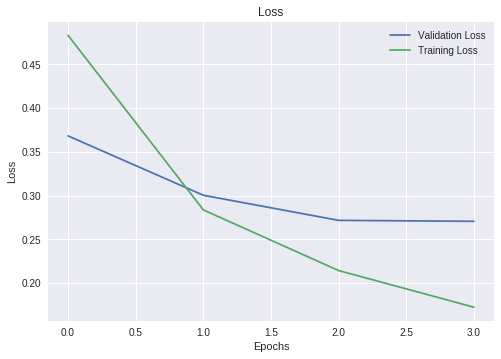

In [205]:
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

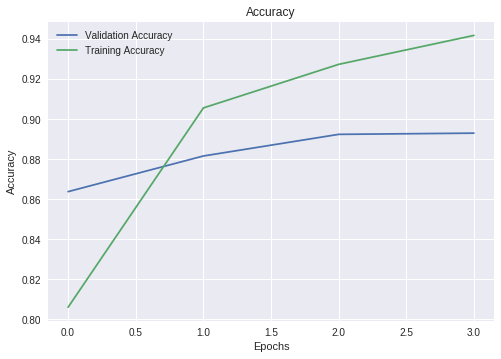

In [206]:
plt.plot(h['val_acc'],label='Validation Accuracy')
plt.plot(h['acc'],label='Training Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [211]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 2s 83us/step


0.94508

In [212]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 2s 87us/step


0.88256

In [214]:
model.predict(X_test)

array([[0.22183266],
       [0.9996654 ],
       [0.93713355],
       ...,
       [0.11071503],
       [0.12783545],
       [0.58451194]], dtype=float32)